# 决策树

决策树是一种基于树形结构的监督学习算法，通过模拟人类决策过程解决分类和回归问题。其核心在于递归地划分特征空间，生成易于解释的规则。

## 决策树模型基本结构

- **根节点（Root Node）**：表示整个数据集，所有数据从根节点开始。

- **内部节点（Internal Nodes）**：每个节点代表一个特征或属性，根据特征的不同取值对数据进行分裂。

- **叶子节点（Leaf Nodes）**：节点代表最终的决策结果。对于分类任务，叶子节点包含类别标签；对于回归任务，叶子节点则包含预测值。

- **边（Edges）**：连接节点的路径，表示数据的分裂规则，如特征值的范围或类别。

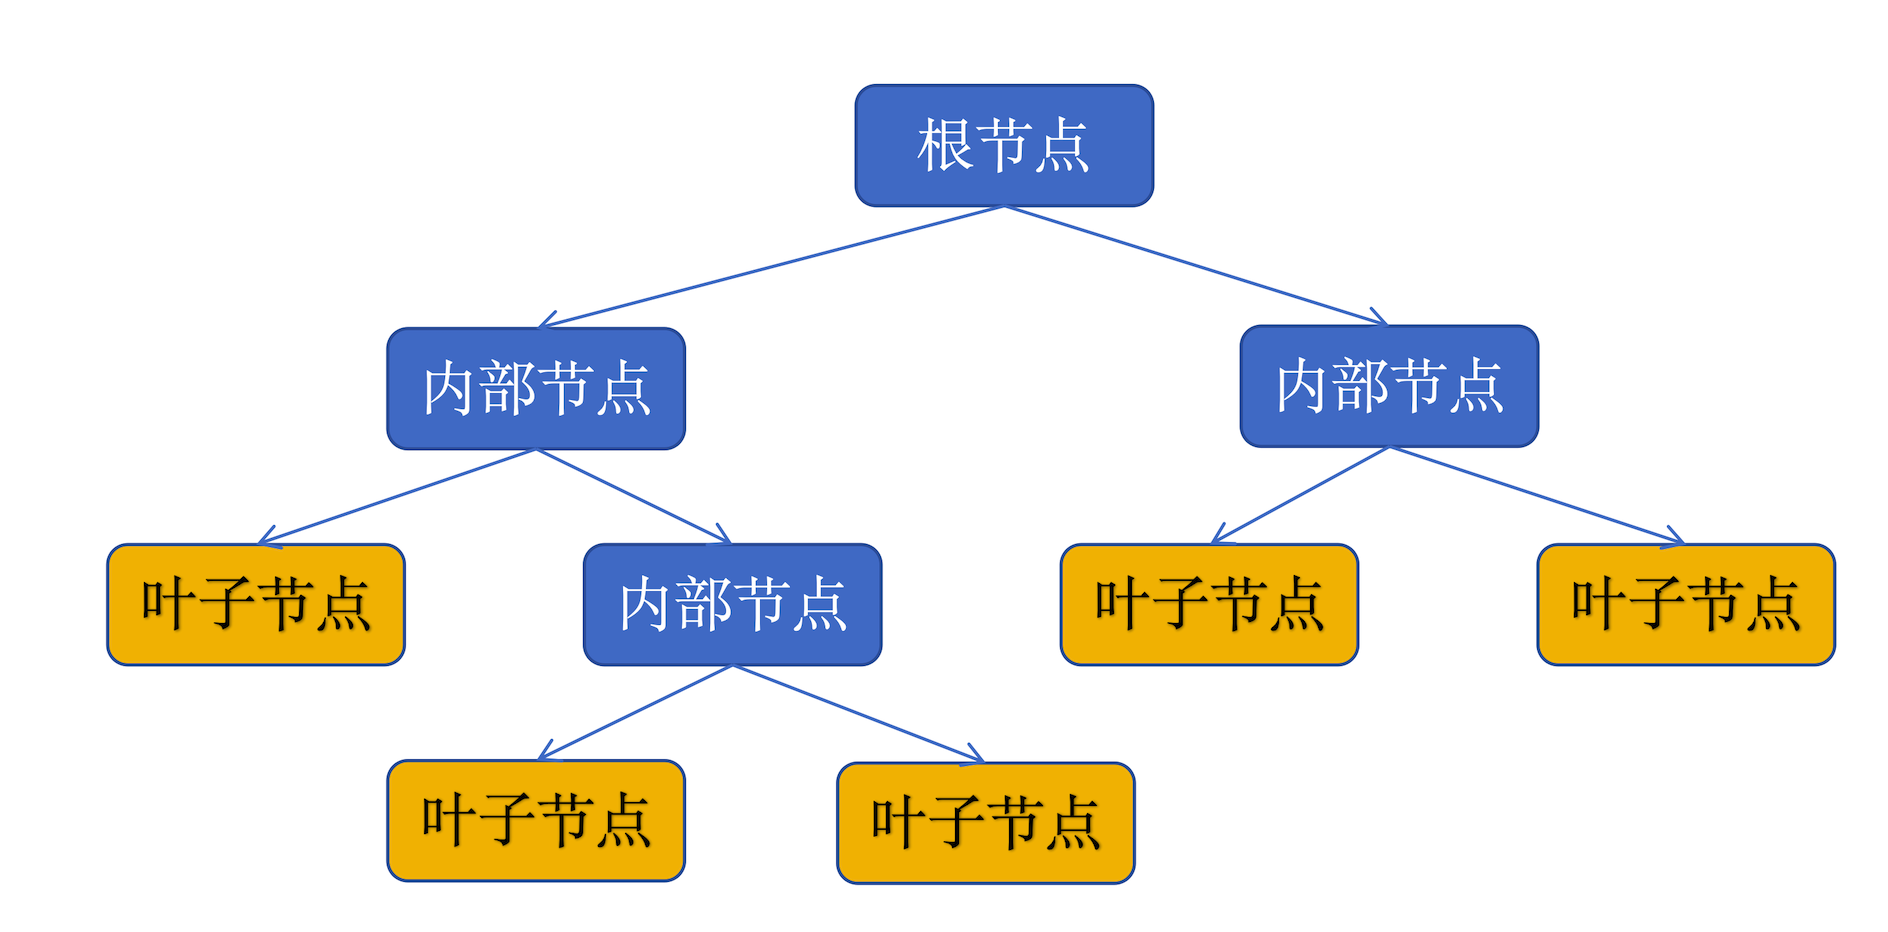

In [1]:
# 决策树模型基本结构示意图
from IPython.display import Image
Image(filename='./pcitures/raw_pics/C25 决策树模型Decision Tree——分类树图1.png', width=600, height=400)

## 决策树种类

### 按任务类型分类

- **分类树**: 预测标签为离散值
    - 垃圾邮件分类
    - 违约用户预测
    - 图片分类
- **回归树**: 预测标签为连续值
    - 房价预测
    - 股票价格预测
    - 商品销量预测

### 按算法分类

| 算法       | 类型    | 特征选择标准                | 是否支持回归 | 特点           |
| -------- | ----- | --------------------- | ------ | ------------ |
| **ID3**  | 分类    | 信息增益（Entropy）         | 否      | 构造简单，但偏好多值特征 |
| **C4.5** | 分类    | 信息增益率                 | 否      | 支持连续值和缺失值处理  |
| **CART** | 分类和回归 | 基尼不纯度（分类）<br>方差减少（回归） | 是      | 使用二叉树结构      |


## 决策树模型构建过程

### 整体流程概览

1. **输入**：带标签的训练数据集$D$，特征集合$F$。
2. **输出**：一棵由节点和分支组成的决策树。
3. **核心步骤**：
   - **步骤1**：选择最优特征和分割点。
   - **步骤2**：根据分割点划分数据集，生成子节点。
   - **步骤3**：对每个子节点递归重复步骤1-2，直至满足停止条件。
   - **步骤4**：剪枝优化（可选）。

### 最优特征和分割点选择

#### 特征选择标准

决策树通过量化特征对数据纯度的提升能力来选择最优特征。不同任务采用不同指标：

- **分类任务**：
  - **信息增益（Information Gain）**：基于熵（Entropy）的减少量，公式为：
    $$IG(D, F) = H(D) - \sum_{v \in \text{Values}(F)} \frac{|D_v|}{|D|} H(D_v)$$
    其中$H(D) = -\sum_{i=1}^k p_i \log_2 p_i$，$p_i$是类别$i$的比例。
  - **基尼不纯度（Gini Impurity）**：衡量随机样本分类错误的概率，公式为：
    $$Gini(D) = 1 - \sum_{i=1}^k p_i^2$$
    **选择策略**：优先选择基尼不纯度最小或信息增益最大的特征。
    
- **回归任务**：
  - **方差减少（Variance Reduction）**：选择分割点使子节点的目标值方差最小化：
    $$\text{最优分割点} = \arg\min_{s} \left( \sum_{左子节点} (y_i - \bar{y}_左)^2 + \sum_{右子节点} (y_i - \bar{y}_右)^2 \right)$$
    其中$\bar{y}_左, \bar{y}_右$为左右子节点的目标均值。

#### 分割点搜索方法
- **连续特征**：排序后遍历所有可能的分割点（通常取相邻值的中点），选择使指标最优的点。
  - **示例**：特征“年龄”的值为 [22, 25, 30, 35]，候选分割点为 23.5（22和25中点）、27.5、32.5。
- **类别特征**：
  - **多类别**：按类别子集划分（如C4.5算法）或根据目标均值排序后二分（CART）。
  - **示例**：特征“颜色”有红、蓝、绿三个类别，计算每个子集（如“红 vs 蓝+绿”）的纯度，选择最优划分。

### 递归分裂与停止条件

#### 递归分裂
- 对每个子节点重复特征选择和分割过程，逐步生成树的分支。
- **示例**（分类任务）：
  1. 根节点按“年龄≤30”划分数据。
  2. 左子节点进一步按“收入>50k”划分，右子节点按“职业=学生”划分。

#### 停止条件
- **预定义阈值**：
  - 节点样本数小于 `min_samples_split`。
  - 树的深度达到 `max_depth`。
  - 纯度提升小于 `min_impurity_decrease`（如基尼不纯度减少量<0.01）。
- **自然终止**：
  - 节点样本全属于同一类别（分类任务）或方差为0（回归任务）。
  - 无剩余特征可用（需开启特征重复使用选项）。

### 剪枝优化

#### 过拟合问题
决策树倾向于生成复杂的树结构以完美拟合训练数据，导致泛化能力差。因此有必要对决策树进行剪枝优化。

#### 剪枝方法
- **预剪枝（Pre-Pruning）**：在训练过程中提前终止分裂。
  - **参数控制**：设置 `max_depth`、`min_samples_leaf` 等。
- **后剪枝（Post-Pruning）**：先生成完整树，再自底向上剪枝。
  - **代价复杂度剪枝（CCP）**：通过复杂度参数$\alpha$平衡误差和树规模：
    $$\text{Cost Complexity} = \frac{\text{误分类误差}}{\text{叶节点数} + \alpha}$$
  - **步骤**：
    1. 生成完整树并计算每个节点的$\alpha$阈值。
    2. 逐步剪去$\alpha$最小的子树，通过交叉验证选择最优剪枝程度。

### 结果输出

- 分类树：每个叶节点输出**多数类**或类别概率分布
- 回归树：每个叶子节点的预测值为该节点内所有样本的**目标均值**

## 决策树模型优缺点

### 决策树模型优点

- **易于理解和可解释**：决策树的结构简单，模型容易理解。通过树的每个节点和分裂条件，用户可以清楚地知道模型的决策过程。

- **无需特征缩放**：决策树不需要对输入数据进行标准化或归一化，适应各种数据类型。

- **可以处理非线性关系**：决策树不需要假设特征和目标之间存在线性关系，因此能够很好地处理复杂的非线性关系。

- **可处理缺失值**：决策树能够处理含有缺失值的样本。

### 决策树模型缺点

- **容易过拟合**：如果树生长得过深，容易对训练数据过拟合。过拟合后，模型可能在测试集上表现较差。

- **不稳定性**：决策树对数据的微小变化非常敏感。即使是训练集中的一些小的波动，也可能导致树的结构发生很大变化。

- **偏向于具有更多类别的特征**：在数据集中的特征有很大差异时，决策树有时倾向于选择类别更多的特征进行分裂，可能导致不够平衡的结果。

# 分类树手算案例

## 案例背景

演示案例是一个14天内天气情况与是否打球的记录。这个数据集包含14天的天气情况，每个样本有4个特征和1个二元分类标签（是/否）。

数据集的目标是根据特征（天气、温度、湿度、有风）预测是否适合打球（是否打球）

| 日期 | 天气   | 温度   | 湿度   | 有风 | 是否打球 |
|------|--------|--------|--------|------|----------|
| 1    | 晴天   | 炎热   | 高     | 否   | 否       |
| 2    | 晴天   | 炎热   | 高     | 是   | 否       |
| 3    | 多云   | 炎热   | 高     | 否   | 是       |
| 4    | 雨天   | 温和   | 高     | 否   | 是       |
| 5    | 雨天   | 凉爽   | 正常   | 否   | 是       |
| 6    | 雨天   | 凉爽   | 正常   | 是   | 否       |
| 7    | 多云   | 凉爽   | 正常   | 是   | 是       |
| 8    | 晴天   | 温和   | 高     | 否   | 否       |
| 9    | 晴天   | 凉爽   | 正常   | 否   | 是       |
| 10   | 雨天   | 温和   | 正常   | 否   | 是       |
| 11   | 晴天   | 温和   | 正常   | 是   | 是       |
| 12   | 多云   | 温和   | 高     | 是   | 是       |
| 13   | 多云   | 炎热   | 正常   | 否   | 是       |
| 14   | 雨天   | 温和   | 高     | 是   | 否       |

## 计算根节点的信息熵

- 总样本数：14天。
- 标签分布（是否打球）：是（9天），否（5天）。
- 根节点熵公式：
$$\text{熵}(S) = - \sum_{i=1}^{n} P(x=i) \log_2 P(X=i) = -\frac{9}{14} \log_2 \frac{9}{14} - \frac{5}{14} \log_2 \frac{5}{14} \approx 0.940$$

## 选择最佳分割特征

遍历所有特征（天气、温度、湿度、有风），计算每个特征的**信息增益**，选择增益最大的特征作为根节点。

### 特征1：天气
- 取值：晴天（5天），多云（4天），雨天（5天）。
- 每个取值的标签分布：
  - 晴天: 是（2天），否（3天）→ 熵=0.971。
  - 多云: 是（4天），否（0天）→ 熵=0。
  - 雨天: 是（3天），否（2天）→ 熵=0.971。
- 信息增益：
$$\text{增益}(S, \text{天气}) = 0.940 - \left( \frac{5}{14} \times 0.971 + \frac{4}{14} \times 0 + \frac{5}{14} \times 0.971 \right) \approx 0.246$$

### 特征2：温度
- 取值：炎热（4天），温和（6天），凉爽（4天）。
- 每个取值的标签分布：
  - 炎热: 是（2天），否（2天）→ 熵=1。
  - 温和: 是（4天），否（2天）→ 熵=0.918。
  - 凉爽: 是（3天），否（1天）→ 熵=0.811。
- 信息增益：
$$\text{增益}(S, \text{温度}) = 0.940 - \left( \frac{4}{14} \times 1 + \frac{6}{14} \times 0.918 + \frac{4}{14} \times 0.811 \right) \approx 0.029$$

### 特征3：湿度
- 取值：高（7天），正常（7天）。
- 每个取值的标签分布：
  - 高: 是（3天），否（4天）→ 熵=0.985。
  - 正常: 是（6天），否（1天）→ 熵=0.592。
- 信息增益：
$$\text{增益}(S, \text{湿度}) = 0.940 - \left( \frac{7}{14} \times 0.985 + \frac{7}{14} \times 0.592 \right) \approx 0.152$$

### 特征4：有风
- 取值：是（6天），否（8天）。
- 每个取值的标签分布：
  - 是: 是（3天），否（3天）→ 熵=1。
  - 否: 是（6天），否（2天）→ 熵=0.811。
- 信息增益：
$$\text{增益}(S, \text{有风}) = 0.940 - \left( \frac{6}{14} \times 1 + \frac{8}{14} \times 0.811 \right) \approx 0.048$$

### 结论
**天气的信息增益最大（0.246）**，因此选择天气作为根节点的分割特征。

## 根节点分割后的子树

根据天气特征将数据集分为三个子集：晴天、多云、雨天。接下来对每个子集递归计算信息增益，选择最佳分割特征。
- **根节点**：天气。
- **分支**：
  1. **多云分支**（4天）：所有样本标签均为是，直接标记为叶节点（是否打球=是）。
  2. **晴天分支**（5天）：标签分布为是（2）、否（3），需进一步分割。
  3. **雨天分支**（5天）：标签分布为是（3）、否（2），需进一步分割。

### 天气=多云的分支

- **子集数据**（4天）
| 日期 | 天气 | 温度 | 湿度 | 有风 | 是否打球 |
| -- | -- | -- | -- | -- | ---- |
| 3  | 多云 | 炎热 | 高  | 否  | 是    |
| 7  | 多云 | 凉爽 | 正常 | 是  | 是    |
| 12 | 多云 | 温和 | 高  | 是  | 是    |
| 13 | 多云 | 炎热 | 正常 | 否  | 是    |

- **标签分布**：全是“是”（纯度100%），无需进一步分割。
- **决策规则**：如果天气=多云 → 打球（是）。

### 天气=雨天的分支​

- **子集数据**（5天）
| 日期 | 天气 | 温度 | 湿度 | 有风 | 是否打球 |
| -- | -- | -- | -- | -- | ---- |
| 4  | 雨天 | 温和 | 高  | 否  | 是    |
| 5  | 雨天 | 凉爽 | 正常 | 否  | 是    |
| 6  | 雨天 | 凉爽 | 正常 | 是  | 否    |
| 10 | 雨天 | 温和 | 正常 | 否  | 是    |
| 14 | 雨天 | 温和 | 高  | 是  | 否    |

- **标签分布**：是（3天），否（2天）→ 熵=0.971。
- **计算信息增益**：
    - **温度**：
        - 温和（3天）：是（2天），否（1天）→ 熵=0.918。
        - 凉爽（2天）：是（1天），否（1天）→ 熵=1。
        - 增益 = 0.971 - (3/5 × 0.918 + 2/5 × 1) ≈ 0.019。
    - **湿度**：
        - 高（2天）：是（1天），否（1天）→ 熵=1。
        - 正常（3天）：是（2天），否（1天）→ 熵=0.918。
        - 增益 = 0.971 - (2/5 × 1 + 3/5 × 0.918) ≈ 0.019。
    - **有风**：
        - 是（2天）：否（2天）→ 熵=0（纯节点）。
        - 否（3天）：是（3天）→ 熵=0（纯节点）。
        - 增益 = 0.971 - (2/5 × 0 + 3/5 × 0) = 0.971（最大增益）。
- **结论**：“有风”的信息增益最大（0.971），选择“有风”作为分割特征。
- **分割结果**：
    - 有风=是：日期6、14 → 不打球（否）。
    - 有风=否：日期4、5、10 → 打球（是）。
- **决策规则**：
    - 如果天气=雨天且有风 → 不打球（否）。
    - 如果天气=雨天且无风 → 打球（是）。

### 天气=晴天的分支

- **子集数据**（5天）
| 日期 | 天气 | 温度 | 湿度 | 有风 | 是否打球 |
| -- | -- | -- | -- | -- | ---- |
| 1  | 晴天 | 炎热 | 高  | 否  | 否    |
| 2  | 晴天 | 炎热 | 高  | 是  | 否    |
| 8  | 晴天 | 温和 | 高  | 否  | 否    |
| 9  | 晴天 | 凉爽 | 正常 | 否  | 是    |
| 11 | 晴天 | 温和 | 正常 | 是  | 是    |

- **标签分布**：是（2天），否（3天）→ 熵=0.971。
- **计算信息增益**：
- **温度**：
    - 炎热（2天）：否（2天）→ 熵=0。
    - 温和（2天）：是（1天），否（1天）→ 熵=1。
    - 凉爽（1天）：是（1天）→ 熵=0。
    - 增益 = 0.971 - (2/5 × 0 + 2/5 × 1 + 1/5 × 0) = 0.571。
- **湿度**：
    - 高（3天）：否（3天）→ 熵=0。
    - 正常（2天）：是（2天）→ 熵=0。
    - 增益 = 0.971 - (3/5 × 0 + 2/5 × 0) = 0.971（最大增益）。
- **有风**：
    - 是（2天）：是（1天），否（1天）→ 熵=1。
    - 否（3天）：是（1天），否（2天）→ 熵=0.918。
    - 增益 = 0.971 - (2/5 × 1 + 3/5 × 0.918) ≈ 0.020。
- **结论**：“湿度”的信息增益最大（0.971），选择“湿度”作为分割特征。
- **分割结果**：
    - 湿度=高：日期1、2、8 → 不打球（否）。
    - 湿度=正常：日期9、11 → 打球（是）。
- **决策规则**：
    - 如果天气=晴天且湿度=高 → 不打球（否）。
    - 如果天气=晴天且湿度=正常 → 打球（是）。

## 分类树计算结果

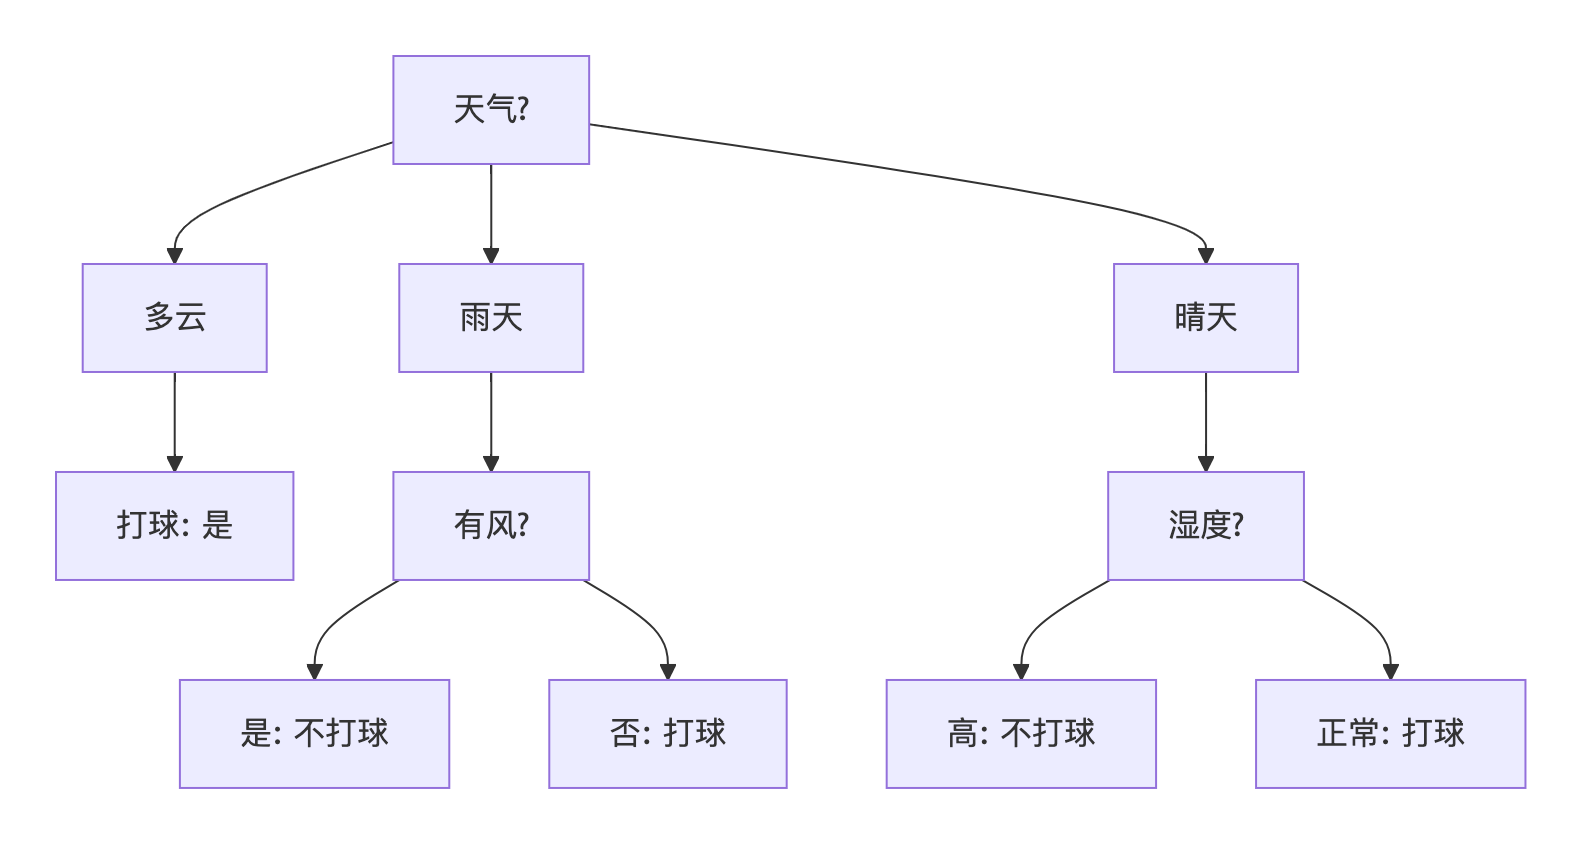

In [2]:
from IPython.display import Image
Image(filename='./pcitures/raw_pics/C25 决策树模型Decision Tree——分类树图2.png', width=600, height=400)


# 分类树sklearn实现

## DecisionTreeClassifier

- `criterion`: 分裂依据
    - gini: 基尼增益，默认值
    - entropy: 信息增益
- `max_depth`: 树的最大深度
- `min_samples_split`: 节点分裂最小样本数，默认=2（即每个叶子节点至少需要2个样本）
- `min_samples_leaf`: 叶节点最小样本数
- `max_features`: 最大特征数
- `max_leaf_nodes`: 最多叶子节点数
- `ccp_alpha`: 剪枝参数α，控制叶子数量与复杂度。越大剪枝越强，模型越简单。默认值为0（不剪枝）
- `class_weight`: 类别权重
- `random_state`: 随机数种子

## 泰坦尼克数据集

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

In [8]:
# 导入必要的库
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,Second,man,True,NaN,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,2,First,woman,False,B,Southampton,yes,True
888,0,3,0,28.0,1,2,23.4500,2,Third,woman,False,NaN,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,0,First,man,True,C,Cherbourg,yes,True


## 代码实现

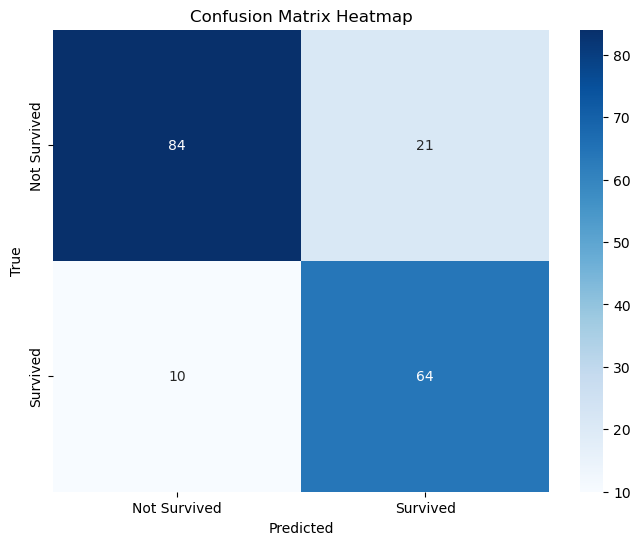

Classification Report:
              precision    recall  f1-score   support

           0     0.8936    0.8000    0.8442       105
           1     0.7529    0.8649    0.8050        74

    accuracy                         0.8268       179
   macro avg     0.8233    0.8324    0.8246       179
weighted avg     0.8355    0.8268    0.8280       179



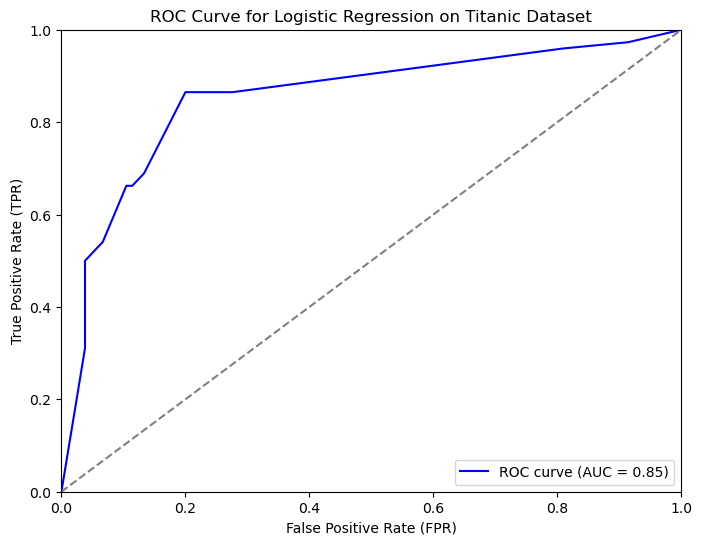

In [9]:
# 选择特征列（X）和目标列（y）
# 特征列： 'pclass'（舱位）, 'sex'（性别）, 'age'（年龄）, 'sibsp'（兄弟姐妹/配偶）, 
#         'parch'（父母/子女）, 'fare'（票价）, 'embarked'（登船港口）
# 目标列： 'survived'（是否生还，0=未生还，1=生还）
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = df[features].dropna()  # 删除缺失值
y = df['survived']  # 目标变量：生还状态

# 数据集划分：80% 用于训练，20% 用于验证
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 创建和训练决策树模型
# 创建决策树分类器
dt_clf = DecisionTreeClassifier(
    criterion='gini',       # 分裂标准
    max_depth=5,           # 限制树深度防止过拟合
    min_samples_split=10,  # 节点最少样本数
    min_samples_leaf=5,    # 叶节点最少样本数
    class_weight='balanced',  # 处理类别不平衡
    random_state=42
)

# 训练模型
dt_clf.fit(X_train, y_train)

# 模型评估
# 在测试集上进行预测
y_probs = dt_clf.predict_proba(X_test)[:, 1]    # 获取正类别（生存）的概率
y_pred = dt_clf.predict(X_test)                 # 获取分类预测结果（0 或 1）

# 计算混淆矩阵（Confusion Matrix）
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵热力图
plt.figure(figsize=(8, 6))  # 设置图像大小
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"], 
            yticklabels=["Not Survived", "Survived"])  # 生成热力图
plt.title("Confusion Matrix Heatmap")  # 设置标题
plt.xlabel('Predicted')  # X 轴标签
plt.ylabel('True')  # Y 轴标签
plt.show()  # 显示图像

# 生成分类报告（包括精确率、召回率、F1 分数等）
class_report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(class_report)

# 计算 ROC 曲线（假阳性率和真正率）与AUC得分
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)  # 计算 AUC（曲线下面积）

# 绘制 ROC 曲线
plt.figure(figsize=(8, 6))  # 设置图像大小
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')  # 绘制 ROC 曲线
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 绘制对角线（随机猜测的表现）
plt.xlim([0.0, 1.0])  # 设置 X 轴范围
plt.ylim([0.0, 1])  # 设置 Y 轴范围
plt.xlabel('False Positive Rate (FPR)')  # X 轴标签：假阳性率
plt.ylabel('True Positive Rate (TPR)')  # Y 轴标签：真正率
plt.title('ROC Curve for Logistic Regression on Titanic Dataset')  # 设置标题
plt.legend(loc='lower right')  # 添加图例
plt.show()  # 显示图像

# 决策树可视化

## export_text

**export_text**: 将训练好的决策树模型转换为可读的文本规则
- `decision_tree`: 训练好的决策树模型
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `max_depth`: 导出的最大深度
- `spacing`: 缩进空格数
- `decimals`: 数值的小数位数
- `show_weights`: 是否显示样本权重信息

In [5]:
# 决策树可视化
# 文本形式展示决策规则
tree_rules = export_text(dt_clf, feature_names=features)
print("\n决策规则:")
print(tree_rules)


决策规则:
|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- age <= 27.50
|   |   |   |--- age <= 24.50
|   |   |   |   |--- age <= 4.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  4.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- age >  24.50
|   |   |   |   |--- class: 1
|   |   |--- age >  27.50
|   |   |   |--- age <= 49.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  49.50
|   |   |   |   |--- age <= 52.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  52.00
|   |   |   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- fare <= 23.35
|   |   |   |--- embarked <= 1.50
|   |   |   |   |--- fare <= 15.37
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  15.37
|   |   |   |   |   |--- class: 1
|   |   |   |--- embarked >  1.50
|   |   |   |   |--- fare <= 10.82
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- fare >  10.82
|   |   |   |   |   |--- class: 1
|   |   |--- fare >  23.35
|   |   |   |--- age <= 9.50

## plot_tree

**plot_tree**: 生成直观的决策树树形结构图
- `decision_tree`: 训练好的决策树模型
- `max_depth`: 显示的最大深度
- `feature_names`: 特征名称列表
- `class_names`: 类别名称列表
- `label`: 节点信息显示内容
- `filled`: 是否填充颜色
- `impurity`: 是否显示不纯度
- `node_ids`: 是否显示节点ID
- `proportion`: 是否显示比例
- `rounded`: 是否圆角边框
- `precision`: 数值显示精度
- `fontsize`: 字体大小

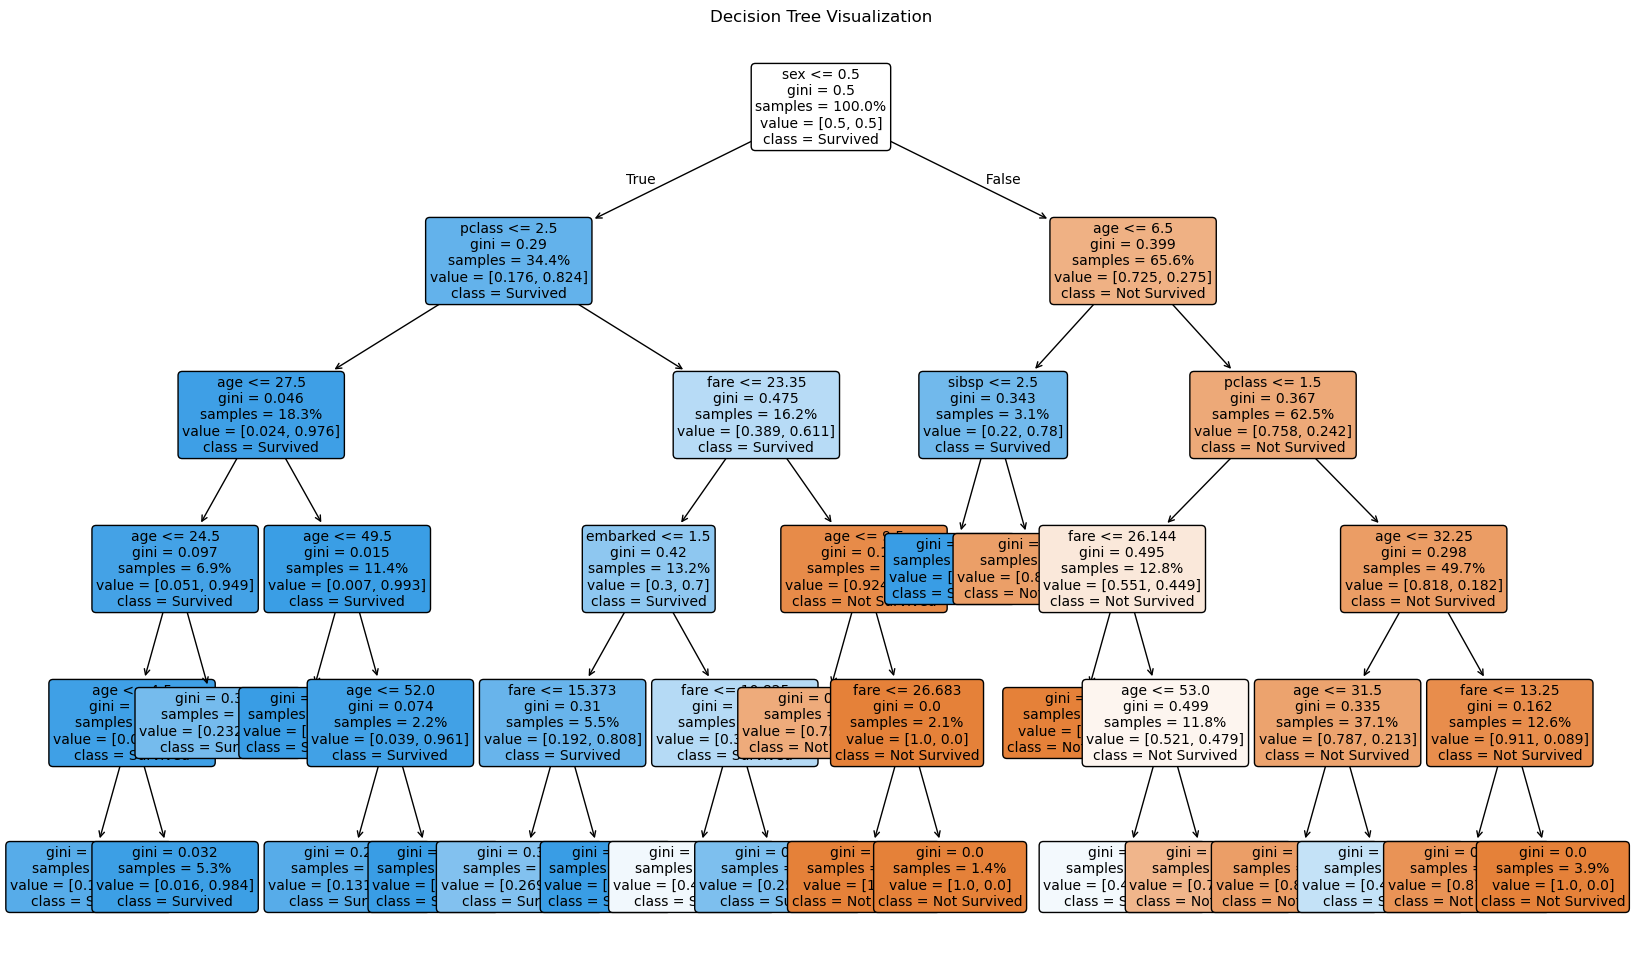

In [6]:
# 图形化展示决策树

# 创建一个新的图形窗口，设置大小为20英寸宽×12英寸高
plt.figure(figsize=(20, 12))
# 使用plot_tree函数绘制决策树
plot_tree(
    dt_clf,  # 训练好的决策树分类器对象
    feature_names=features,  # 特征名称列表，对应训练时使用的特征
    class_names=['Not Survived', 'Survived'],  # 类别标签名称，0对应'Not Survived'，1对应'Survived'
    filled=True,  # 是否填充节点颜色，True表示用不同颜色填充节点以表示不同类别
    rounded=True,  # 是否使用圆角矩形框，True表示使用圆角边框，视觉效果更美观
    proportion=True,  # 是否显示样本比例而非绝对数量，True表示显示各类别在节点中的比例
    fontsize=10  # 设置字体大小为10磅，确保文字清晰可读
)
# 添加图表标题
plt.title('Decision Tree Visualization')
# 显示图形
plt.show()

# 特征重要度

**特征重要性(feature importance)**是决策树模型中用于衡量各个特征对预测结果贡献程度的指标。
- 每次决策树在某特征上进行划分时，都会带来一定的不纯度下降（例如 Gini 指数下降）。 
- 把所有由该特征引起的不纯度下降值累加，再进行归一化（总和为 1），即可得到特征重要度。
- 计算公式为：
$$\text{Feature Importance}_j = \sum_{t \in T_j} \frac{N_t}{N} \cdot \Delta \text{Impurity}_t$$
- 其中：
    - $T_j$：使用特征$j$进行划分的所有节点集合 
    - $N_t$：第$t$个节点的样本数量 
    - $N$：总样本数 
    - $\text{Impurity}_t$：该节点划分带来的不纯度下降 

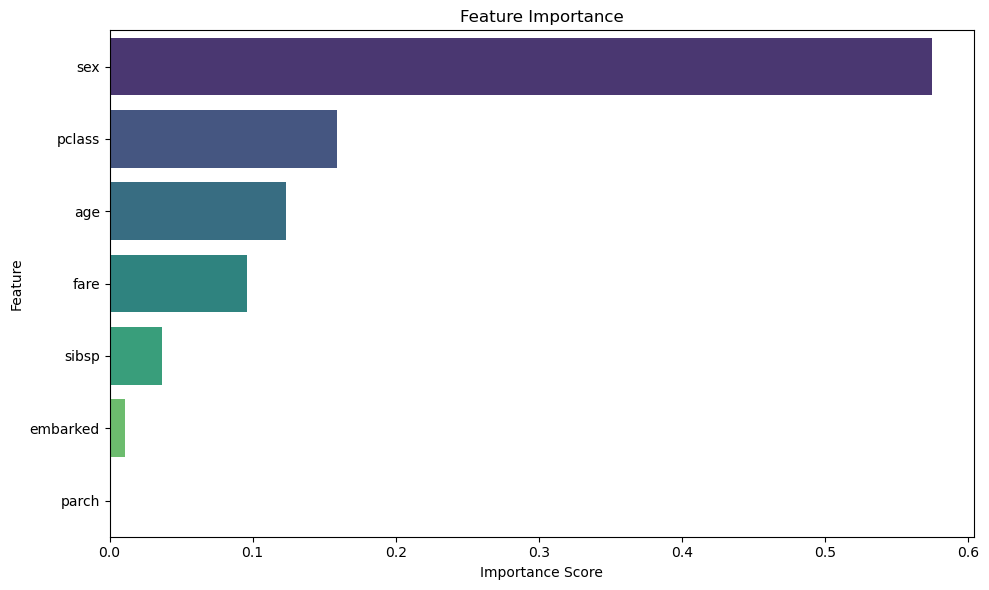

In [10]:
# 获取决策树模型中各特征的重要性分数
# feature_importances_属性返回一个数组，包含每个特征对预测的贡献度（值越大表示越重要）
feature_importance = dt_clf.feature_importances_

importance_df = pd.DataFrame({
    'feature': features,        # 特征名称列（来自之前的features列表）
    'importance': feature_importance  # 对应的特征重要性分数
}).sort_values('importance', ascending=False)  # 按重要性降序排序

# 创建图形窗口，设置大小为10英寸宽×6英寸高
plt.figure(figsize=(10, 6))
# 使用seaborn绘制水平条形图
sns.barplot(
    x='importance',  # x轴为重要性分数
    y='feature',     # y轴为特征名称
    data=importance_df,  # 数据来源
    palette='viridis'  # 使用viridis颜色方案（黄-绿-蓝渐变）
)
plt.title('Feature Importance')  # 主标题
plt.xlabel('Importance Score')   # x轴标签（重要性分数）
plt.ylabel('Feature')           # y轴标签（特征名称）
plt.tight_layout()              # 自动调整子图参数，使图形元素不重叠
plt.show()                      # 显示图形